# Question 1:

### Scenario: The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

# Importing necessary libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a XOR table

In [43]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# Creatig a Perceptron

In [44]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        sum_inputs = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if sum_inputs >= 0 else 0  # threshold function

    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

# Initialize, train and test the perceptron

In [45]:
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

print("Single Layer Perceptron predictions:")
for inputs in X:
    print(f"Input: {inputs}, Prediction: {perceptron.predict(inputs)}")

Single Layer Perceptron predictions:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


Single Layer Perceptron fails to correctly classify the XOR outputs due to the non-linearly separable nature of XOR

# Import the necessary library for MLP


In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize, train and predict the Multi-Layer Perceptron (MLP) model


In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='adam', max_iter=2000)

mlp.fit(X, y)

y_pred = mlp.predict(X)

print("\nMulti-Layer Perceptron predictions:")
for inputs, prediction in zip(X, y_pred):
    print(f"Input: {inputs}, Prediction: {prediction}")


Multi-Layer Perceptron predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Accuracy of the MLP model


In [51]:
print(f"\nAccuracy: {accuracy_score(y, y_pred) * 100:.2f}%")


Accuracy: 100.00%


# Visualize and plot the decision boundary


In [52]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

    plt.colorbar(scatter)

    plt.title('Decision Boundary of MLP for XOR Problem')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='0'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='1')]

    plt.legend(handles=handles, title="Classes")

    plt.show()


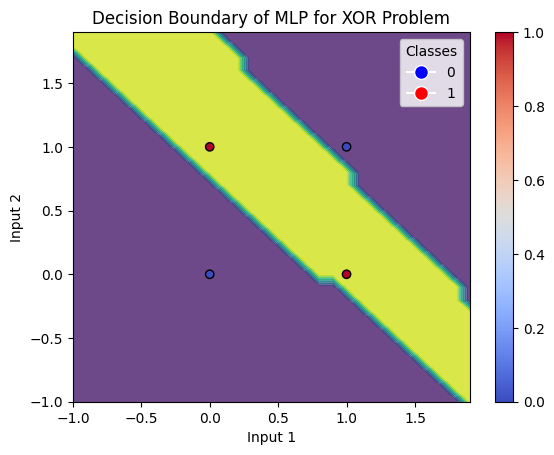

In [53]:
plot_decision_boundary(X, y, mlp)

The MLP will correctly classify the XOR gate. The decision boundary plot shows the non-linear separation

# Question 2:

### B. Sentiment Analysis Using ANN on IMDb Movie Reviews

In [54]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers

# Step 1: Load the dataset

In [55]:
df = pd.read_csv('/content/IMDB - IMDB Dataset.csv')

# Step 2: Data Preprocessing


In [66]:
def clean_text(text):
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 3: Tokenize and Pad Sequences


In [57]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])

In [58]:
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=200)
y = df['sentiment'].values

# Step 4: Train-test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the ANN model


In [60]:
model = Sequential()

# Embedd
model.add(Embedding(input_dim=5000, output_dim=32, input_length=200))

# flatten
model.add(Flatten())

# hidden layer (relu)
model.add(Dense(64))
model.add(ReLU())
model.add(Dropout(0.5))

# output layer(Sigmoid)
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Step 6: Train the model


In [61]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.6734 - loss: 0.5504 - val_accuracy: 0.8596 - val_loss: 0.3208
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9193 - loss: 0.2157 - val_accuracy: 0.8510 - val_loss: 0.3552
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9737 - loss: 0.0859 - val_accuracy: 0.8515 - val_loss: 0.4419
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9919 - loss: 0.0313 - val_accuracy: 0.8379 - val_loss: 0.6267
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9977 - loss: 0.0108 - val_accuracy: 0.8434 - val_loss: 0.6929


We see that as the epochs increase, the accuracy and loss decrease, this shows that the model is learning on each epoch

# Step 7: Evaluate the model


In [62]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on the test set: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8516 - loss: 0.6583
Accuracy on the test set: 85.82%


The accuracy on the test data is significantly acceptable as it shows a greater accuracy compared to training data

# Step 8: Plot loss over epochs


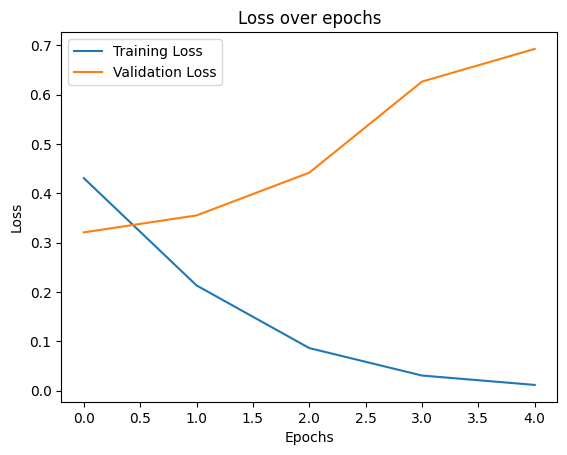

In [63]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Training Loss: It continuously decreases across epochs, reaching close to zero by the final epoch. This indicates that the model is learning from the training data and minimizing the error effectively.
- Validation Loss: It initially decreases slightly, but after the second epoch, it starts increasing. This suggests overfitting, where the model performs well on the training data but struggles to generalize to the validation set. Overfitting becomes more evident in later epochs as the gap between training and validation loss widens.

# Step 9: Predictions on test set


In [64]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 85.82%


The model achieves an 85.82% accuracy on the test set, which is close to the validation accuracy. This suggests that while the model generalizes reasonably well, it still suffers from overfitting

### Final interpretation
The widening gap between training loss and validation loss, along with the higher loss on the test set, indicates overfitting. This means the model has become too specialized to the training data, failing to generalize as well to new, unseen data.